#### 0. Import libraries

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

### 1. Download the data file and read it into a pandas DataFrame.

In [41]:
df = pd.read_csv("data/homes.csv")
df.head(10)

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0
5,135,140.0,18.0,7.0,4.0,3.0,9.0,0.57,3028.0
6,150,160.0,20.0,8.0,4.0,3.0,18.0,4.00,3131.0
7,207,225.0,22.0,8.0,4.0,2.0,16.0,2.22,5158.0
8,271,285.0,30.0,10.0,5.0,2.0,30.0,0.53,5702.0
9,89,90.0,10.0,5.0,3.0,1.0,43.0,0.30,2054.0


### 2. Add the code necessary to describe the dataset

In [53]:
df.shape

(51, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


In [55]:
df.describe(include='all')

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,51,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,NaN,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,NaN,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,NaN,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,NaN,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,NaN,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000


In [49]:
df.corr(numeric_only=True)

,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
List,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


### 3. Using markdown commentary describe the dataset 

The dataset consists of 459 rows and 9 columns. Although most of the values ​​appear to be integers, they are considered floats. Based on my observations, the variables are:

Sell: Selling price of the house (target variable).

List: Listing price of the house.

Living: Living area, likely measured in hundreds of square feet (e.g., 28 ≈ 2,800 sq ft).

Rooms: Total number of rooms in the house.

Beds: Number of bedrooms.

Baths: Number of bathrooms.

Age: Age of the property in years.

Acres: Lot size in acres.

Taxes: Annual property tax amount (USD).

However, more clarification is needed for each variable.

The average list price is $178.34 with 3.8 bedrooms, 1.86 bathrooms, 30 years old, and 1.06 acres.

### 4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis

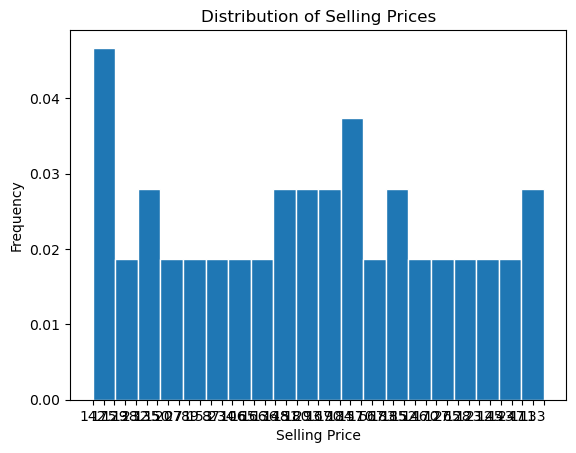

In [62]:
plt.hist(df['Sell'], bins=20, density = True, edgecolor='w');
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

#### Why: 

To explore the distribution of sales prices and whether it can be easily predicted.
To detect patterns that allow for simple estimation or to quickly identify anomalies.
#### Result: 

The distribution of sales prices does not follow a normal distribution; it appears discrete-uniform.

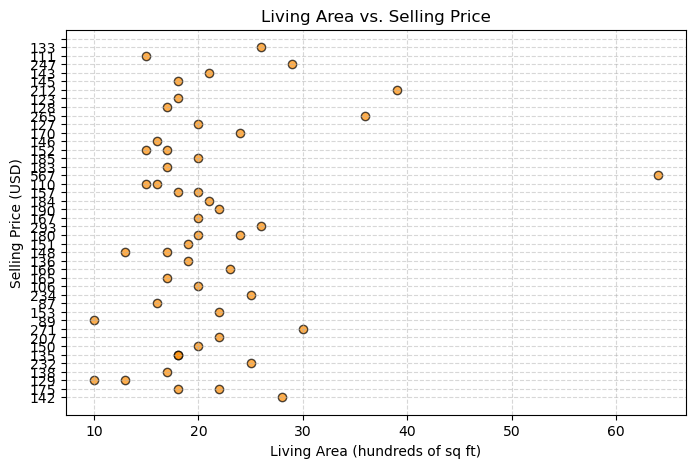

In [75]:
plt.figure(figsize=(8,5))
plt.scatter(df["Living"], df["Sell"], color="darkorange", alpha=0.7, edgecolor="black")
plt.title("Living Area vs. Selling Price")
plt.xlabel("Living Area (hundreds of sq ft)")
plt.ylabel("Selling Price (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

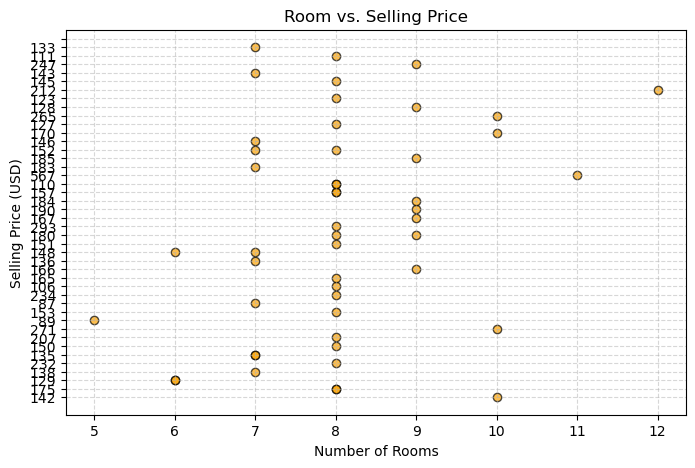

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(df["Rooms"], df["Sell"], color="orange", alpha=0.7, edgecolor="black")
plt.title("Room vs. Selling Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Selling Price (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

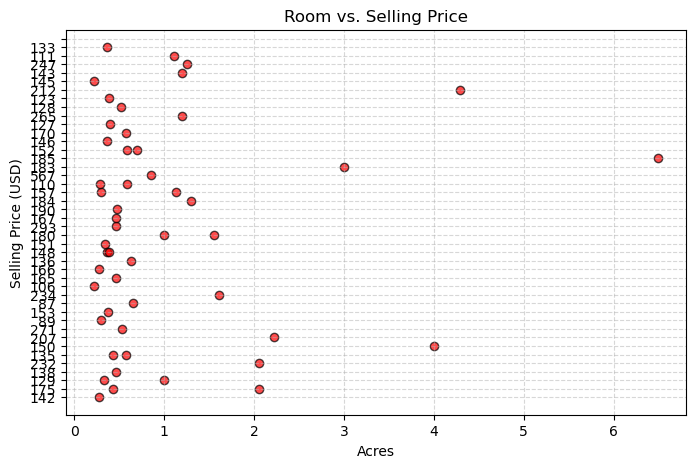

In [70]:
plt.figure(figsize=(8,5))
plt.scatter(df["Acres"], df["Sell"], color="red", alpha=0.7, edgecolor="black")
plt.title("Room vs. Selling Price")
plt.xlabel("Acres")
plt.ylabel("Selling Price (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Why? 

I want to understand if there are variables that can serve as good predictors of a home's sale price. I have a theory that factors such as the size of the house, the living room, and the number of bedrooms can be useful.

#### Result: 

There's no clear pattern between the variables and the result. The closest to being a pattern is the number of bedrooms.

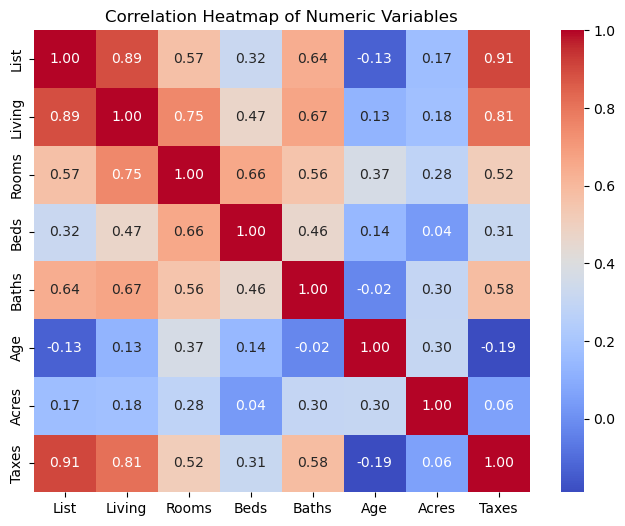

In [80]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

#### Why:

I want to more easily visualize the correlation matrix I created earlier to identify which variables can significantly influence each other.

#### Result:

List price has a strong correlation with Living Room space and Tax. The age of the house is negatively related to the list price and Tax.

### 5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model

In [106]:
df['Sell'].unique()[:10]

array(['142', '175', '129', '138', '232', '135', '150', '207', '271',
       '89'], dtype=object)

In [112]:
# 1. Create a new dataset with only numeric Sell and Taxes
df_reg = df[['Sell', 'Taxes']].dropna().copy()

# 2. Convert both columns to float
df_reg['Sell'] = df_reg['Sell'].astype(float)
df_reg['Taxes'] = df_reg['Taxes'].astype(float)

# 3. Define y and X
y = df_reg['Sell']
X = sm.add_constant(df_reg['Taxes'])   # Add intercept

# 4. Fit the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        20:13:44   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

### 6. Is taxes a good predictor for selling price? Why or why not?

We can see that the distribution is not normal. The P value is less than 10, 5, or 1%. However, the adjusted R-squared shows that 80.5% of the variance of 'Sell' is explained by 'Taxes'. We even know that the 'Taxes' variable is significant since its intervals never equal zero. I would be cautious in identifying a correlation between these variables and a tax not being determined by the price of the house.

### 7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 

In [117]:
# Second regression:
df_reg2 = df[['Sell', 'Living']].dropna().copy()
df_reg2['Sell']   = df_reg2['Sell'].astype(float)
df_reg2['Living'] = df_reg2['Living'].astype(float)

y2 = df_reg2['Sell']
X2 = sm.add_constant(df_reg2['Living'])

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           4.39e-17
Time:                        20:31:12   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

In [121]:
# Third regression
df_reg3 = df[['Sell', 'Age']].dropna().copy()
df_reg3['Sell']   = df_reg3['Sell'].astype(float)
df_reg3['Age'] = df_reg3['Age'].astype(float)

y3 = df_reg3['Sell']
X3 = sm.add_constant(df_reg3['Age'])

model3 = sm.OLS(y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.065
Date:                Mon, 06 Oct 2025   Prob (F-statistic):              0.307
Time:                        20:38:14   Log-Likelihood:                -284.25
No. Observations:                  50   AIC:                             572.5
Df Residuals:                      48   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8230     14.440     12.523      0.0

The best model is one that compares "Taxes" with "Sell." One problem that can arise is knowing how other variables interact with each other, and not just in isolation. This is one of the limitations.